In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

In [69]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [72]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,2
63,6.1,2.9,4.7,1.4,1
3,4.6,3.1,1.5,0.2,0
17,5.1,3.5,1.4,0.3,0
82,5.8,2.7,3.9,1.2,1
24,4.8,3.4,1.9,0.2,0
138,6.0,3.0,4.8,1.8,2
146,6.3,2.5,5.0,1.9,2
98,5.1,2.5,3.0,1.1,1
137,6.4,3.1,5.5,1.8,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 0:-1], df.iloc[:, -1], test_size=0.2, random_state=1)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [75]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


def report(model):
    '''Takes in a model instance and plots out its Confusion Matrix'''
    y_preds = model.predict(X_test)
    cm = confusion_matrix(y_test, y_preds)
    cm_disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cm_disp.plot()

In [ ]:
print("Accuracy of Logistic Regression", accuracy_score(y_test, y_pred1))
print("Accuracy of Decision Trees", accuracy_score(y_test, y_pred2))

Accuracy of Logistic Regression 0.9666666666666667
Accuracy of Decision Trees 0.9666666666666667


In [ ]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test, y_pred1), columns=list(range(0, 3)))

Logistic Regression Confusion Matrix



,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


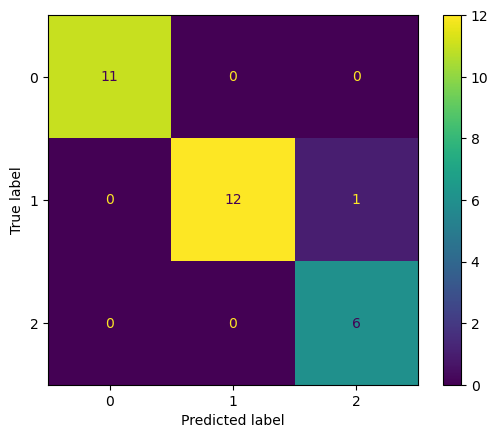

In [81]:
report(clf1)

In [ ]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test, y_pred2), columns=list(range(0, 3)))

Decision Tree Confusion Matrix



,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


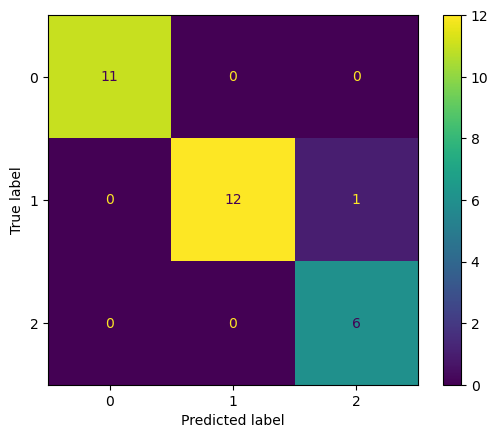

In [83]:
report(clf2)

In [84]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
84,1,1,1
90,1,1,1
92,1,1,1
66,1,1,1
99,1,1,1
94,1,1,1
51,1,1,1
29,0,0,0
102,2,2,2
146,2,2,2


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred1, average=None)

array([1.        , 1.        , 0.85714286])

In [ ]:
recall_score(y_test, y_pred1, average=None)

array([1.        , 0.92307692, 1.        ])